In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bz2
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

#Filenames declaration
fsearches='searches_sample.csv.bz2'
fbookings='bookings_sample.csv.bz2'

## Exercise 1
### Problem statement
* Count the number of lines in Python for each file.

In [15]:
# Read the file line by line and count
count=0
with bz2.BZ2File(fsearches,"r") as file:
    for line in file:
        count +=1
print(count)
nlines_searches = count
# Read the file line by line and count
count=0
with bz2.BZ2File(fbookings,"r") as file:
    for line in file:
        count +=1
print(count)
nlines_bookings=count

10000
10000


In [16]:
searches_df=pd.read_csv(fsearches,sep='^')
searches_df.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [17]:
searches_df.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin', 'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure', 'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode', 'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier', 'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date', 'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival', 'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure', 'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode', 'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier', 'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet', 'IsFromVista', 'TerminalID', 'InternetOffice'], dtype='object')

In [18]:
bookings_df=pd.read_csv(fbookings,sep='^')
bookings_df.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [19]:
bookings_df.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ', 'rloc          ', 'cre_date           ', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class', 'brd_time           ', 'off_time           ', 'pax', 'year', 'month', 'oid      '], dtype='object')

In [21]:
chksize_small=1000
reader=pd.read_csv(fbookings,sep='^',chunksize=chksize_small)
reader

In [22]:
for df in reader:
    [rows,cols] = df.shape
    bookings_labels = df.columns
    bookings_head   = df.head()
    bookings_tail   = df.tail()
    #print(df.shape)
    break
#Show sample
bookings_head

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


## Exercise 2
### Problem statement
* top 10 arrival airports in the world in 2013 (using the bookings file)

Arrival airport is the column arr_port. It is the IATA code for the airport

To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).

Print the top 10 arrival airports in the standard output, including the number of passengers.

Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)

Bonus point: Solve this problem using pandas (instead of any other approach)

In [23]:
#Filename to write the filtered results
ffilter = 'ex2.h5'

#In order to handle numerica NaN values on PAX, we will set missing values to 0.
def nan2zero(num):
    try:
        return np.int(num)
    except:
        return 0

reader = pd.read_csv(fbookings,compression='bz2', sep='^',iterator=True,memory_map=True, \
                     chunksize=chksize_small,converters={'pax':nan2zero},low_memory=False)
with pd.HDFStore(ffilter,mode='w') as store:
    nc = 1
    for df in reader:
        print("Reading chunk number %s"%nc)
        #Reduce the problem to two columns
        df2            = df.filter(['arr_port','pax'],axis=1)
        df2['pax']     = df2['pax'].astype(int)
        df2['arr_port']= df2['arr_port'].astype('str').str.strip().str.upper()
        #Write to file
        store.append('bookings', df2)#data_columns=['arr_port','pax'])
        nc += 1

Reading chunk number 1
Reading chunk number 2
Reading chunk number 3
Reading chunk number 4
Reading chunk number 5
Reading chunk number 6
Reading chunk number 7
Reading chunk number 8
Reading chunk number 9
Reading chunk number 10


In [24]:
#Read the filtered file and check dataframe
df = pd.read_hdf(ffilter,mode='r')
df.head(10)

,arr_port,pax
0,LHR,-1
1,CLT,1
2,CLT,1
3,SVO,1
4,SVO,1
5,LGA,1
6,LGA,1
7,SIN,2
8,SIN,2
9,SIN,2


In [25]:
df['arr_port']=df['arr_port'].str.strip()
mask = df['arr_port'].isin(['NaN', 'NA', ' '])
print(df.shape)
df = df[~mask]
print(df.shape)

(9999, 2)
(9999, 2)


In [26]:
df2 = df.groupby(['arr_port']).sum()
df.head(10)

,arr_port,pax
0,LHR,-1
1,CLT,1
2,CLT,1
3,SVO,1
4,SVO,1
5,LGA,1
6,LGA,1
7,SIN,2
8,SIN,2
9,SIN,2


In [27]:
df3=df2.sort_values('pax',ascending=False)
df3.head(10)

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


## Explore the HDFS

In [29]:
def keys(f):
    return [key for key in f.keys()]

import h5py
#read hdfs：  
f = h5py.File(ffilter,'r')          #open h5 file  
print(f.keys())                     #check all the main key  


k = f['bookings']                   # extract the main key which is 'bookings'
print(list(k))
a = f['bookings']['_i_table']   
b= f['bookings']['table']
print(a)
print(b)
print(list(a))
print(list(b)[:5])
f.close()  



KeysView(<HDF5 file "ex2.h5" (mode r)>)
['_i_table', 'table']
<HDF5 group "/bookings/_i_table" (1 members)>
<HDF5 dataset "table": shape (9999,), type "|V15">
['index']
[(0, [b'LHR'], [-1]), (1, [b'CLT'], [1]), (2, [b'CLT'], [1]), (3, [b'SVO'], [1]), (4, [b'SVO'], [1])]


* pip install GeoBases3K

## Exercise 3
### Problem statement
* plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

In [30]:
chksize_small=1000
reader=pd.read_csv(fsearches,sep='^',chunksize=chksize_small)

for df in reader:
    [rows,cols] = df.shape
    searches_labels = df.columns
    searches_head   = df.head()
    searches_tail   = df.tail()
    #print(df.shape)
    break
#Show sample
searches_head

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [37]:
list(searches_labels)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [56]:
ffilter = 'ex3.h5'
#In order to handle numerica NaN values on PAX, we will set missing values to 0.
def nan2zero(num):
    try:
        return np.int(num)
    except:
        return 0

reader = pd.read_csv(fsearches,compression='bz2', sep='^',iterator=True,memory_map=True, \
                     chunksize=chksize_small)#,converters={'pax':nan2zero})
with pd.HDFStore(ffilter,mode='w') as store:
    nc = 1
    for df in reader:
        print("Reading chunk number %s"%nc)
        #Reduce the problem to two columns
        df2 = df.filter(['Destination','Date'],axis=1)
        #Drop NaN values
        df2 = df2.dropna(axis=0,how='any')
        #Go to datetime format with pandas
        df2['Date'] = pd.to_datetime(df2['Date'],errors='coerce',yearfirst=True)
        df2['Day'] = df2['Date'].dt.day
        #Make sure string is clean (no white spaces)
        df2['Destination']= df2['Destination'].astype('str').str.strip().str.upper()
        #Write to file
        store.append('searches', df2)#data_columns=['arr_port','pax'])
        nc += 1

Reading chunk number 1
Reading chunk number 2
Reading chunk number 3
Reading chunk number 4
Reading chunk number 5
Reading chunk number 6
Reading chunk number 7
Reading chunk number 8
Reading chunk number 9
Reading chunk number 10


In [57]:
%matplotlib inline

#Read the filtered file and check dataframe
df = pd.read_hdf(ffilter,mode='r')
df.head(5)

,Destination,Date,Day
0,AUH,2013-01-01,1
1,MIL,2013-01-01,1
2,SFO,2013-01-01,1
3,ARN,2013-01-01,1
4,MAD,2013-01-01,1


Total searches for AGP over the year are = 48
Total searches for MAD over the year are = 125
Total searches for BCN over the year are = 162
Total searches for HKG over the year are = 65


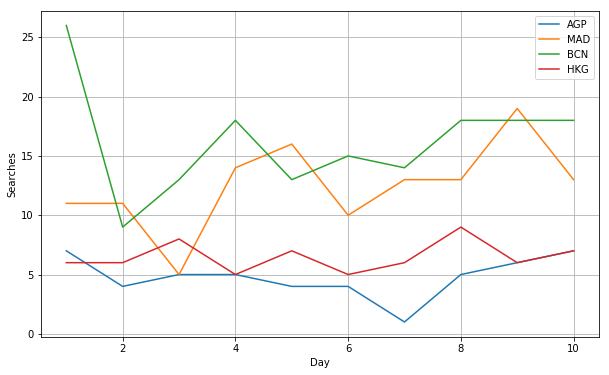

In [60]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
vDSTN = ['AGP','MAD','BCN','HKG']
for DSTN in vDSTN:
    survey = df[df['Destination'] == DSTN]
    df2 = survey.groupby(['Day']).count()
    df2 = df2.reset_index(level=['Day'])
    print("Total searches for %s over the year are = %s"%(DSTN,df2['Destination'].sum()))
    df2.plot(x='Day',y='Destination',label=DSTN,ax=ax)
ax.set_ylabel('Searches')
plt.grid('on')